In [1]:
import pandas as pd
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
import random
import numpy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ltai2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('train.csv')

In [3]:
len(data)

290183

In [4]:
# data = data[data['Language'] == 'en']

In [5]:
len(data)

290183

In [6]:
data.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [7]:
data = data[['Genre', 'Language', 'Lyrics']]

In [8]:
data.rename(columns={'Genre':'genre', 'Language':'lang', 'Lyrics':'lyrics'}, inplace=True)

In [9]:
data

,genre,lang,lyrics
0,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,Rock,en,You say you know just who I am\nBut you can't ...
4,Rock,en,My heart is beating faster can't control these...
...,...,...,...
290178,R&B,en,I'm the best friend he's got I'd give him the ...
290179,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,Pop,en,Forgive me for the things That I never said to...
290181,Indie,en,The day they found a cure for AIDS The day the...


In [10]:
data['genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [11]:
# Rock = 1, Metal = 2, Pop = 3, Indie = 4, Folk = 5, Electronic = 6, R&B = 7, Jazz = 8, Hip-hop = 9, Country = 10
data['genre'][data['genre'] == 'Rock'] = 1
data['genre'][data['genre'] == 'Metal'] = 2
data['genre'][data['genre'] == 'Pop'] = 3
data['genre'][data['genre'] == 'Indie'] = 4
data['genre'][data['genre'] == 'Folk'] = 5
data['genre'][data['genre'] == 'Electronic'] = 6
data['genre'][data['genre'] == 'R&B'] = 7
data['genre'][data['genre'] == 'Jazz'] = 8
data['genre'][data['genre'] == 'Hip-Hop'] = 9
data['genre'][data['genre'] == 'Country'] = 10

In [12]:
data['genre']

0         1
1         1
2         1
3         1
4         1
         ..
290178    7
290179    3
290180    3
290181    4
290182    3
Name: genre, Length: 290183, dtype: object

In [13]:
data

,genre,lang,lyrics
0,1,en,"It starts with pain, followed by hate\nFueled ..."
1,1,en,Freedom!\nAlone again again alone\nPatiently w...
2,1,en,"Biting the hand that feeds you, lying to the v..."
3,1,en,You say you know just who I am\nBut you can't ...
4,1,en,My heart is beating faster can't control these...
...,...,...,...
290178,7,en,I'm the best friend he's got I'd give him the ...
290179,3,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,3,en,Forgive me for the things That I never said to...
290181,4,en,The day they found a cure for AIDS The day the...


In [14]:
data.dropna(axis=0, inplace=True)

In [15]:
data['lyrics'].isna().sum()

0

In [16]:
data = data.reset_index()

In [17]:
data

,index,genre,lang,lyrics
0,0,1,en,"It starts with pain, followed by hate\nFueled ..."
1,1,1,en,Freedom!\nAlone again again alone\nPatiently w...
2,2,1,en,"Biting the hand that feeds you, lying to the v..."
3,3,1,en,You say you know just who I am\nBut you can't ...
4,4,1,en,My heart is beating faster can't control these...
...,...,...,...,...
290139,290178,7,en,I'm the best friend he's got I'd give him the ...
290140,290179,3,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290141,290180,3,en,Forgive me for the things That I never said to...
290142,290181,4,en,The day they found a cure for AIDS The day the...


In [18]:
data_dict = data.set_index('index').T.to_dict()

In [19]:
data_dict[1]

{'genre': 1,
 'lang': 'en',
 'lyrics': "Freedom!\nAlone again again alone\nPatiently waiting by the phone\nHoping that you will call me home\nThe pain inside my love denied\nHopes and dreams swallowed by pride\nEverything I need it lies in you\n'Cause I'm broken\nI know I need you now\n'Cause deep inside I'm broken\nYou see the way I live\nI know I know your heart is broken\nWhen I turn away\nI need to be broken\nTake the pain away\nI question why you chose to die\nWhen you knew your truth I would deny\nYou look at me\nThe tears begin to fall\nAnd all in all faith is blind\nBut I fail time after time\nDaily in my sin I take your life\n'Cause I'm broken\nI know I need you now\n'Cause deep inside I'm broken\nYou see the way I live\nI know I know your heart is broken\nWhen I turn away\nI need to be broken\nTake the pain away\nAll the hate deep inside\nSlowly covering my eyes\nAll these things I hide\nAway from you again\nAll this fear holding me\nMy heart is cold and I believe\nNothing's 

In [20]:
punct = set(string.punctuation)
def cleanLyrics(data):
    for d in data:           
        data[d]['lyrics'] = data[d]['lyrics'].replace('\n', ' ').lower()
        non_punct = []
        for w in data[d]['lyrics'].split():
            w = ''.join([c for c in w.lower() if not c in punct])
            non_punct.append(w)
        delim = " "
        data[d]['lyrics'] = delim.join(non_punct)

In [21]:
cleanLyrics(data_dict)

In [22]:
data_dict[1]

{'genre': 1,
 'lang': 'en',
 'lyrics': 'freedom alone again again alone patiently waiting by the phone hoping that you will call me home the pain inside my love denied hopes and dreams swallowed by pride everything i need it lies in you cause im broken i know i need you now cause deep inside im broken you see the way i live i know i know your heart is broken when i turn away i need to be broken take the pain away i question why you chose to die when you knew your truth i would deny you look at me the tears begin to fall and all in all faith is blind but i fail time after time daily in my sin i take your life cause im broken i know i need you now cause deep inside im broken you see the way i live i know i know your heart is broken when i turn away i need to be broken take the pain away all the hate deep inside slowly covering my eyes all these things i hide away from you again all this fear holding me my heart is cold and i believe nothings gonna change until im broken this time let go 

Performing EDA:

In [23]:
totalGenreCounts = defaultdict(int)
data_dict[1002]['genre']
for d in data_dict:
    songGenre = data_dict[d]['genre']
    totalGenreCounts[songGenre] += 1

In [24]:
totalGenreCounts

defaultdict(int,
            {1: 121391,
             2: 20286,
             3: 108693,
             4: 8449,
             7: 2793,
             5: 8644,
             6: 2213,
             8: 13545,
             9: 2240,
             10: 1890})

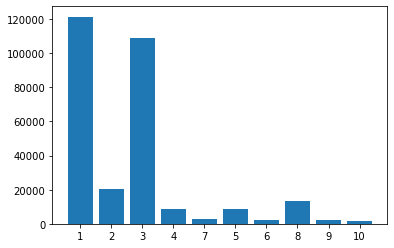

In [25]:
genres = list(totalGenreCounts.keys())
counts = list(totalGenreCounts.values())
plt.bar(range(len(totalGenreCounts)), counts, tick_label=genres)
plt.show()

From the above plot, we see that Rock and Pop make up most of the data, with the rest of the genres being pretty evenly distributed

In [26]:
word_counts = defaultdict(int)
stop_words = stopwords.words('english')
for d in data_dict:
    r = ''.join([c for c in data_dict[d]['lyrics'].lower() if not c in punct])
    words = r.split()
    for word in words:
        if not word in stop_words:
            word_counts[word] += 1

In [27]:
allCounts = [(word_counts[w], w) for w in word_counts]
allCounts.sort(reverse=True)

In [28]:
top10WordsAcrossAll = allCounts[:10]
top10WordsAcrossAll

[(575383, 'im'),
 (403933, 'dont'),
 (402142, 'love'),
 (379047, 'know'),
 (364821, 'like'),
 (293091, 'oh'),
 (271621, 'got'),
 (257421, 'get'),
 (226989, 'go'),
 (220155, 'que')]

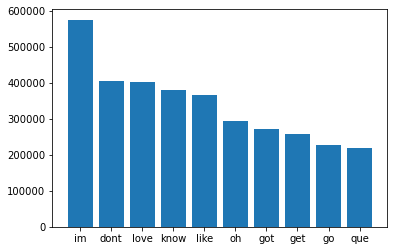

In [29]:
top10Words = []
top10WordCounts = []
for i in range(len(top10WordsAcrossAll)):
    top10Words.append(top10WordsAcrossAll[i][1])
    top10WordCounts.append(top10WordsAcrossAll[i][0])
plt.bar(range(len(top10WordsAcrossAll)), top10WordCounts, tick_label=top10Words)
plt.show()

In [30]:
rock_word_counts = defaultdict(int)
metal_word_counts = defaultdict(int)
pop_word_counts = defaultdict(int)
indie_word_counts = defaultdict(int)
folk_word_counts = defaultdict(int)
electronic_word_counts = defaultdict(int)
rb_word_counts = defaultdict(int)
jazz_word_counts = defaultdict(int)
hiphop_word_counts = defaultdict(int)
country_word_counts = defaultdict(int)

In [31]:
for d in data_dict:
    r = ''.join([c for c in data_dict[d]['lyrics'].lower() if not c in punct])
    words = r.split()
    if data_dict[d]['genre'] == 1:
        for word in words:
            if not word in stop_words:
                rock_word_counts[word] += 1
    elif data_dict[d]['genre'] == 2:
        for word in words:
            if not word in stop_words:
                metal_word_counts[word] += 1
    elif data_dict[d]['genre'] == 3:
        for word in words:
            if not word in stop_words:
                pop_word_counts[word] += 1
    elif data_dict[d]['genre'] == 4:
        for word in words:
            if not word in stop_words:
                indie_word_counts[word] += 1
    elif data_dict[d]['genre'] == 5:
        for word in words:
            if not word in stop_words:
                folk_word_counts[word] += 1
    elif data_dict[d]['genre'] == 6:
        for word in words:
            if not word in stop_words:
                electronic_word_counts[word] += 1
    elif data_dict[d]['genre'] == 7:
        for word in words:
            if not word in stop_words:
                rb_word_counts[word] += 1
    elif data_dict[d]['genre'] == 8:
        for word in words:
            if not word in stop_words:
                jazz_word_counts[word] += 1
    elif data_dict[d]['genre'] == 9:
        for word in words:
            if not word in stop_words:
                hiphop_word_counts[word] += 1
    else:
        for word in words:
            if not word in stop_words:
                country_word_counts[word] += 1

In [32]:
rockCounts = [(rock_word_counts[w], w) for w in rock_word_counts]
metalCounts = [(metal_word_counts[w], w) for w in metal_word_counts]
popCounts = [(pop_word_counts[w], w) for w in pop_word_counts]
indieCounts = [(indie_word_counts[w], w) for w in indie_word_counts]
folkCounts = [(folk_word_counts[w], w) for w in folk_word_counts]
electronicCounts = [(electronic_word_counts[w], w) for w in electronic_word_counts]
rbCounts = [(rb_word_counts[w], w) for w in rb_word_counts]
jazzCounts = [(jazz_word_counts[w], w) for w in jazz_word_counts]
hiphopCounts = [(hiphop_word_counts[w], w) for w in hiphop_word_counts]
countryCounts = [(country_word_counts[w], w) for w in country_word_counts]
rockCounts.sort(reverse=True)
metalCounts.sort(reverse=True)
popCounts.sort(reverse=True)
indieCounts.sort(reverse=True)
folkCounts.sort(reverse=True)
electronicCounts.sort(reverse=True)
rbCounts.sort(reverse=True)
jazzCounts.sort(reverse=True)
hiphopCounts.sort(reverse=True)
countryCounts.sort(reverse=True)

In [33]:
top10Rock = rockCounts[:10]
top10Metal = metalCounts[:10]
top10Pop = popCounts[:10]
top10Indie = indieCounts[:10]
top10Folk = folkCounts[:10]
top10Electronic = electronicCounts[:10]
top10Rb = rbCounts[:10]
top10Jazz = jazzCounts[:10]
top10Hiphop = hiphopCounts[:10]
top10Country = countryCounts[:10]

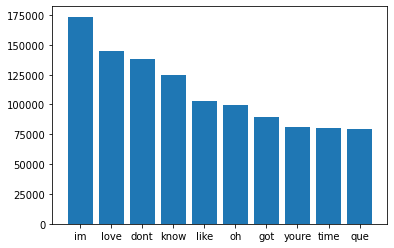

In [34]:
topRockCounts = []
topRockWords = []
for i in range(len(top10Rock)):
    topRockWords.append(top10Rock[i][1])
    topRockCounts.append(top10Rock[i][0])
plt.bar(range(len(top10Rock)), topRockCounts, tick_label=topRockWords)
plt.show()

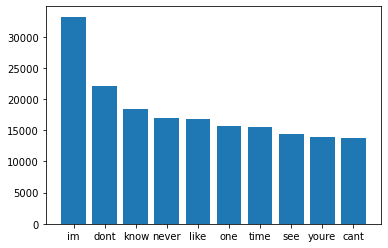

In [35]:
topMetalCounts = []
topMetalWords = []
for i in range(len(top10Metal)):
    topMetalWords.append(top10Metal[i][1])
    topMetalCounts.append(top10Metal[i][0])
plt.bar(range(len(top10Metal)), topMetalCounts, tick_label=topMetalWords)
plt.show()

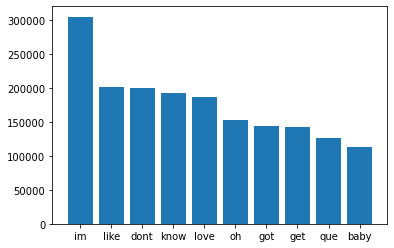

In [36]:
topPopCounts = []
topPopWords = []
for i in range(len(top10Pop)):
    topPopWords.append(top10Pop[i][1])
    topPopCounts.append(top10Pop[i][0])
plt.bar(range(len(top10Pop)), topPopCounts, tick_label=topPopWords)
plt.show()

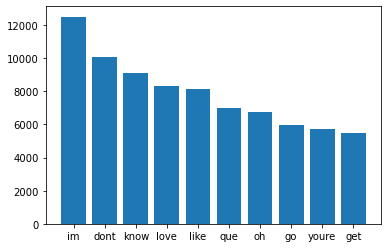

In [37]:
topIndieCounts = []
topIndieWords = []
for i in range(len(top10Indie)):
    topIndieWords.append(top10Indie[i][1])
    topIndieCounts.append(top10Indie[i][0])
plt.bar(range(len(top10Indie)), topIndieCounts, tick_label=topIndieWords)
plt.show()

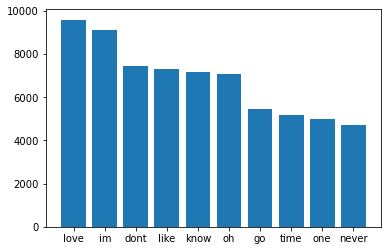

In [38]:
topFolkCounts = []
topFolkWords = []
for i in range(len(top10Folk)):
    topFolkWords.append(top10Folk[i][1])
    topFolkCounts.append(top10Folk[i][0])
plt.bar(range(len(top10Folk)), topFolkCounts, tick_label=topFolkWords)
plt.show()

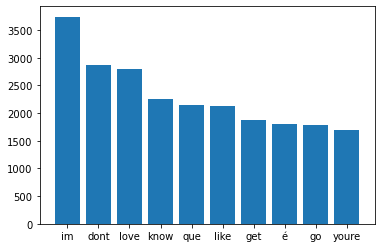

In [39]:
topElectronicCounts = []
topElectronicWords = []
for i in range(len(top10Electronic)):
    topElectronicWords.append(top10Electronic[i][1])
    topElectronicCounts.append(top10Electronic[i][0])
plt.bar(range(len(top10Electronic)), topElectronicCounts, tick_label=topElectronicWords)
plt.show()

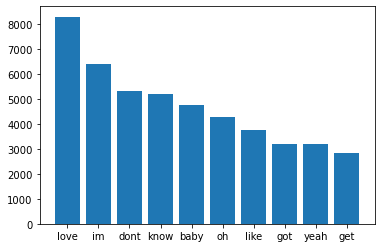

In [40]:
topRbCounts = []
topRbWords = []
for i in range(len(top10Rb)):
    topRbWords.append(top10Rb[i][1])
    topRbCounts.append(top10Rb[i][0])
plt.bar(range(len(top10Rb)), topRbCounts, tick_label=topRbWords)
plt.show()

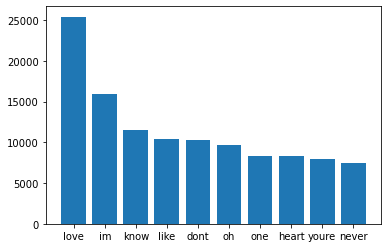

In [41]:
topJazzCounts = []
topJazzWords = []
for i in range(len(top10Jazz)):
    topJazzWords.append(top10Jazz[i][1])
    topJazzCounts.append(top10Jazz[i][0])
plt.bar(range(len(top10Jazz)), topJazzCounts, tick_label=topJazzWords)
plt.show()

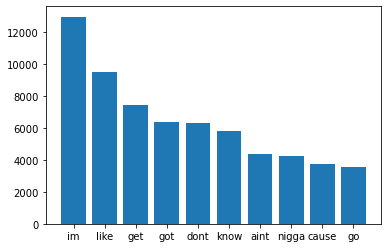

In [42]:
topHiphopCounts = []
topHiphopWords = []
for i in range(len(top10Hiphop)):
    topHiphopWords.append(top10Hiphop[i][1])
    topHiphopCounts.append(top10Hiphop[i][0])
plt.bar(range(len(top10Hiphop)), topHiphopCounts, tick_label=topHiphopWords)
plt.show()

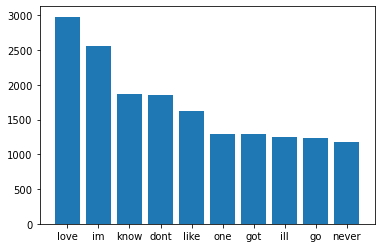

In [43]:
topCountryCounts = []
topCountryWords = []
for i in range(len(top10Country)):
    topCountryWords.append(top10Country[i][1])
    topCountryCounts.append(top10Country[i][0])
plt.bar(range(len(top10Country)), topCountryCounts, tick_label=topCountryWords)
plt.show()

In [44]:
averageNumWordsRock = averageNumWordsMetal = averageNumWordsPop = averageNumWordsIndie = averageNumWordsFolk = averageNumWordsElectronic = averageNumWordsRb = averageNumWordsJazz = averageNumWordsHiphop = averageNumWordsCountry = 0
totalRockCount = totalMetalCount = totalPopCount = totalIndieCount = totalFolkCount = totalElectronicCount = totalRbCount = totalJazzCount = totalHiphopCount = totalCountryCount = 0
for d in data_dict:
    r = ''.join([c for c in data_dict[d]['lyrics'].lower() if not c in punct])
    words = r.split()
    if data_dict[d]['genre'] == 1:
        for word in words:
            totalRockCount += 1
    elif data_dict[d]['genre'] == 2:
        for word in words:
            totalMetalCount += 1
    elif data_dict[d]['genre'] == 3:
        for word in words:
            totalPopCount += 1
    elif data_dict[d]['genre'] == 4:
        for word in words:
            totalIndieCount += 1
    elif data_dict[d]['genre'] == 5:
        for word in words:
            totalFolkCount += 1
    elif data_dict[d]['genre'] == 6:
        for word in words:
            totalElectronicCount += 1
    elif data_dict[d]['genre'] == 7:
        for word in words:
            totalRbCount += 1
    elif data_dict[d]['genre'] == 8:
        for word in words:
            totalJazzCount += 1
    elif data_dict[d]['genre'] == 9:
        for word in words:
            totalHiphopCount += 1
    else:
        for word in words:
            totalCountryCount += 1
averageNumWordsRock = totalRockCount/totalGenreCounts[1]
averageNumWordsMetal = totalMetalCount/totalGenreCounts[2]
averageNumWordsPop = totalPopCount/totalGenreCounts[3]
averageNumWordsIndie = totalIndieCount/totalGenreCounts[4]
averageNumWordsFolk = totalFolkCount/totalGenreCounts[5]
averageNumWordsElectronic = totalElectronicCount/totalGenreCounts[6]
averageNumWordsRb = totalRbCount/totalGenreCounts[7]
averageNumWordsJazz = totalJazzCount/totalGenreCounts[8]
averageNumWordsHiphop = totalHiphopCount/totalGenreCounts[9]
averageNumWordsCountry = totalCountryCount/totalGenreCounts[10]

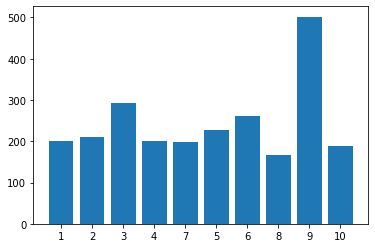

In [45]:
averageCounts = [averageNumWordsRock, averageNumWordsMetal, averageNumWordsPop, averageNumWordsIndie, averageNumWordsFolk, averageNumWordsElectronic, averageNumWordsRb, averageNumWordsJazz, averageNumWordsHiphop, averageNumWordsCountry]
plt.bar(range(len(averageCounts)), averageCounts, tick_label=genres)
plt.show()

In [46]:
commonWords = []
commonWords = set(topRockWords).intersection(set(topMetalWords))
commonWords = set(commonWords).intersection(set(topPopWords))
commonWords = set(commonWords).intersection(set(topIndieWords))
commonWords = set(commonWords).intersection(set(topFolkWords))
commonWords = set(commonWords).intersection(set(topElectronicWords))
commonWords = set(commonWords).intersection(set(topRbWords))
commonWords = set(commonWords).intersection(set(topJazzWords))
commonWords = set(commonWords).intersection(set(topHiphopWords))
commonWords = set(commonWords).intersection(set(topCountryWords))
commonWords

{'dont', 'im', 'know', 'like'}

In [47]:
# Baseline Prediciton

In [48]:
data2 = pd.read_csv('train.csv')
data2 = data2[['Genre', 'Language', 'Lyrics']]
data2.rename(columns={'Genre':'genre', 'Language':'lang', 'Lyrics':'lyrics'}, inplace=True)
data2['genre'][data2['genre'] == 'Rock'] = 1
data2['genre'][data2['genre'] == 'Metal'] = 2
data2['genre'][data2['genre'] == 'Pop'] = 3
data2['genre'][data2['genre'] == 'Indie'] = 4
data2['genre'][data2['genre'] == 'Folk'] = 5
data2['genre'][data2['genre'] == 'Electronic'] = 6
data2['genre'][data2['genre'] == 'R&B'] = 7
data2['genre'][data2['genre'] == 'Jazz'] = 8
data2['genre'][data2['genre'] == 'Hip-Hop'] = 9
data2['genre'][data2['genre'] == 'Country'] = 10
data2.dropna(axis=0, inplace=True)
data2 = data2.reset_index()
data_dict2 = data2.set_index('index').T.to_dict()

In [49]:
# Rock = 1, Metal = 2, Pop = 3, Indie = 4, Folk = 5, Electronic = 6, R&B = 7, Jazz = 8, Hip-hop = 9, Country = 10
genreDict = {
    "Rock": 1,
    "Metal": 2,
    "Pop": 3,
    "Indie": 4,
    "Folk": 5,
    "Electronic": 6,
    "R&B": 7,
    "Jazz": 8,
    "Hip-hop": 9,
    "Country": 10
}

data_list = list(data_dict.values())
data_list2 = list(data_dict2.values())
temp = list(zip(data_list, data_list2))
random.shuffle(temp)
data_list, data_list2 = zip(*temp)
data_list, data_list2 = list(data_list), list(data_list2)
nTrain = int(len(data_list) * 0.8)
dataTrain = data_list[:nTrain]
dataTest = data_list[nTrain:]
dataValid = data_list2[nTrain:]

for d in dataTest:
    d['genre'] = 1 # If there is no evidence, guess the most popular genre: Rock
    if "she" in d['lyrics']: # Rock
        d['genre'] = 1
    elif "death" in d['lyrics']: # Metal
        d['genre'] = 2
    elif "love" in d['lyrics']: # Pop
        d['genre'] = 3
    elif "sleep" in d['lyrics']: # Indie
        d['genre'] = 4
    elif "old" in d['lyrics']: # Folk
        d['genre'] = 5
    elif "feel" in d['lyrics']: # Electronic
        d['genre'] = 6
    elif "funk" in d['lyrics']: # R&B
        d['genre'] = 7
    elif "jazz" in d['lyrics']: # Jazz
        d['genre'] = 8
    elif "money" in d['lyrics']: # Hip-hop
        d['genre'] = 9
    elif "country" in d['lyrics']: # Country
        d['genre'] = 10
        
correct = 0
count = 0
for (dt, dv) in zip(dataTest, dataValid):
    if dt['genre'] == dv['genre']:
        correct += 1
    count += 1

acc_baseline = correct/count
print("Baseline Accuracy: " + str(acc_baseline))
genrePredict = [d['genre'] for d in dataTest]
genreTest = [d['genre'] for d in dataValid]
cm = confusion_matrix(genreTest, genrePredict)

Baseline Accuracy: 0.33102414310086337


In [50]:
cm_plot = ConfusionMatrixDisplay(cm, range(10))

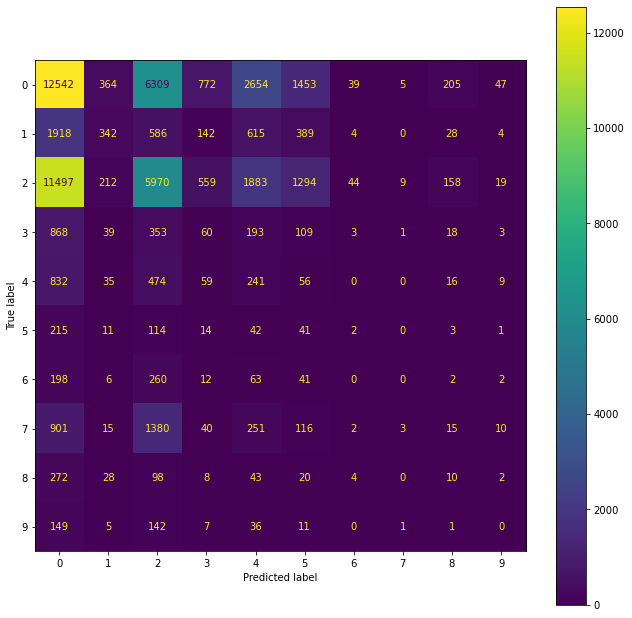

In [51]:
fig, ax = plt.subplots(figsize=(11,11))
cm_plot.plot(ax=ax, values_format='')

In [52]:
precision_baseline = [cm[i][i] for i in range(len(cm))] / cm.sum(axis=0)
avg_precision_baseline = precision_baseline.mean()

In [53]:
print('Baseline average precision: ', avg_precision_baseline)

Baseline average precision:  0.13981957339885265
